# Лабораторная работа 6. 
# Сетевые алгоритмы. Динамические алгоритмы поиска путей.


## Выполнил студент группы ФИО ГРУППА
***

### Задание

1.  Реализовать алгоритм поиска кратчайшего расстояния между двумя вершинами ориентированного взвешенного графа в соответствии с вариантом. 

2.  Предусмотреть задание графа в виде матрицы смежности/инцидентности, читаемой из файла, либо графически с помощью пользовательского интерфейса. 

3.  Разработать графический интерфейс пользователя с визуализацией графа и отображением кратчайшего расстояния между задаваемыми пользователем вершинами.

4. По результатам работы проанализировать временную сложность работы заданного алгоритма в зависимости от числа узлов и ребер графа.
Данные представить в виде таблицы.



### Варианты заданий:

Вариант | Задание
:-------- |:-----
1, 7, 13, 19, 25 | Алгоритм Флойда-Уоршелла
2, 8, 14, 20, 26 | Алгоритм Дейкстры
3, 9,15,21,27 | Алгоритм Беллмана-Форда
4, 10, 16, 22, 28 | Алгоритм Джонсона
5, 11, 17, 23, 29| Алгоритм Левита
6, 12, 18, 24, 30 | Алгоритм Йена



### Выполнение:

In [95]:
import math
import networkx as nx
import ipywidgets as widgets
import pandas as pd
from ipywidgets import interact, interact_manual
from pyvis.network import Network

посторение пути из точки A в точку J:
A->F->J


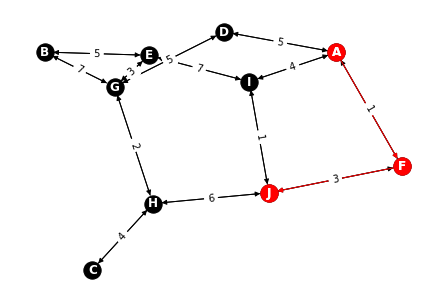

0.0006991999980527908


In [96]:
# Алгоритм Джонсона
import math
import copy
import networkx as nx
import matplotlib.pyplot as plt
import timeit
def matric(rez,alf,path):#создание списка кортеджей длин наименьшего пути
    path_m = []
    for i in range(len(rez)-1):
        for ii in path:
            if ii[0] == alf[rez[i]].upper() and ii[1] == alf[rez[i+1]].upper():
                path_m.append((alf[rez[i]].upper(),alf[rez[i+1]].upper(),ii[2]))
    return path_m
def graf(path,rezMatrix):# отрисовка графа
    G = nx.DiGraph() 
    M = nx.DiGraph()
    E = path
    Er=rezMatrix
    G.add_weighted_edges_from(E)
    M.add_weighted_edges_from(Er)
    pos=nx.spring_layout(G)
    
    nx.draw(G, pos, with_labels=True, font_weight='bold',font_color='white',node_color='black')
    nx.draw(M, pos, with_labels=True, font_weight='bold',font_color='white',node_color='red',edge_color='red')
    
    edge_weight = nx.get_edge_attributes(G,'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels = edge_weight)
    plt.show()    
def mat(z,alf):#создание списка кортеджей которая всебе хранит растоянния от вершин
    v = []
    for k in z:
        v.append(k.split())
    n = len(v)
    path = []
    for i in range(n):
        for ii in range(n):
            if v[i][ii] =="0" or v[i][ii] == '-':
                pass
            else:
                k = i
                kk = ii
                while k>=len(alf):
                    k-=len(alf)
                while kk>=len(alf):
                    kk-=len(alf)                    
                path.append((alf[k].upper(),alf[kk].upper(),v[i][ii]))
    return path

def read_file(f,alf):
    V = []
    z = []
    for i in f:
        z.append(i)
    path = mat(z,alf)
    for i in z:
        k = i.split()
        o = []
        for ii in k:
            if ii == "-":
                o.append(math.inf)
            else:
                o.append(int(ii))
        V.append(o)
        o = []
    return V,path

def d_get_path(path, start, end):
    result = [end]
    while end != start:
        end = path[end]
        result.append(end)
    return result[::-1]

def dijkstra_path(matrix, start, end):
    dist = [matrix[start][i] for i in range(len(matrix))]
    prev = [start for i in range(len(matrix))]
    checked_nodes = set()
    checked_nodes.add(start)
    for i in range(len(matrix)):
        node = 0
        for i in range(len(matrix)):
            if dist[i] < math.inf and i not in checked_nodes:
                node = i
        if node:
            checked_nodes.add(node)
            for i in range(len(matrix)):
                if dist[i] > matrix[node][i] + dist[node]:
                    dist[i] = matrix[node][i] + dist[node]
                    prev[i] = node
    if dist[end] == math.inf:
        return [], dist
    else:
        return d_get_path(prev, start, end), dist

def bellman_ford_path(matrix, start, end,n):
    edges = []
    for i in range(n):
        for j in range(n):
            if i != j and matrix[i][j] < math.inf:
                edges.append((i,j,matrix[i][j]))

    from_pos = 0
    to_pos = 1
    edge_length = 2
    d = [math.inf] * n
    d[start] = 0
    p = [-1] * n
    while True:
        flag = False
        for j in range(len(edges)):
            if d[edges[j][from_pos]] < math.inf:
                if d[edges[j][to_pos]] > d[edges[j][from_pos]] + edges[j][edge_length]: 
                    d[edges[j][to_pos]] = d[edges[j][from_pos]] + edges[j][edge_length]
                    p[edges[j][to_pos]] =  edges[j][from_pos]
                    flag = True
        if not flag:  
            break
    if d[end] == math.inf:
        return [], d
    else:
        path = []
        cur = end
        while cur != -1:
            path.append(cur)
            cur=p[cur]
        return path[::-1], d

def johnsons_path(matrix, start, end,n):
    bf_path, bf_dist = bellman_ford_path(copy.deepcopy(matrix), start, end,n) 
    if bf_dist == []: 
        return []
    for i in range(n):
        for j in range(n):
            if matrix[i][j] != math.inf and bf_dist[i] != math.inf and bf_dist[j] != math.inf:
                matrix[i][j] += bf_dist[i] - bf_dist[j]
    paths = []
    dist = []
    for i in range(n):
        p, d = dijkstra_path(matrix, i, end)
        paths.append(p)
        dist.append(d)
    for i in range(n):
        for j in range(n):
            if dist[i][j] != math.inf and bf_dist[i] != math.inf and bf_dist[j] != math.inf:
                dist[i][j] +=  bf_dist[j] - bf_dist[i]
    return paths[start]


alf = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
f = open("mas.txt", "r",encoding='utf-8')
V, path = read_file(f,alf)
f.close()
n = len(V)#число вершин в графе
s = "A"
e = "J"
put=""
start = alf.index(s.lower())# начальная вершина
end = alf.index(e.lower())#конечная вершина
start_time = timeit.default_timer()
rez= johnsons_path(V, start, end,n)
tmJ = timeit.default_timer() - start_time 

print(f'посторение пути из точки {alf[start].upper()} в точку {alf[end].upper()}:')
for i in rez:
    put += alf[i].upper()+"->"
print(put[:-2])
rezMatrix = matric(rez,alf,path)
graf(path,rezMatrix)

print(tmJ)

### Вывод